# 集成模型案例练习：bagging：近邻

## 1 引用

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

In [3]:
from sklearn.neighbors.classification import KNeighborsClassifier

## 2 数据准备

In [20]:
X01, y01 = datasets.make_classification(n_features=10, random_state=0,n_samples=2000,n_classes=2)
X01[:5]

array([[ 1.59436569,  1.03078626,  0.30247354, -1.10167095, -1.68973026,
         0.71774318,  0.40528735, -0.08356359, -1.40923452,  0.2082834 ],
       [ 2.72008521, -1.26597863,  0.1496603 ,  0.59821301,  0.07375385,
        -2.06431785,  0.81704876, -0.03745744, -1.6137839 ,  0.6058313 ],
       [ 0.29445741, -1.26003514,  0.72045153,  1.55493309,  1.10034868,
         1.07647515, -0.89612289,  0.33355469, -0.52376657, -1.67792021],
       [ 0.76280525,  0.13243187, -1.30328931,  1.20846487, -0.5281914 ,
         1.94986574, -0.53315077,  0.20927766, -0.10791626, -1.32648094],
       [-0.7737158 ,  0.80954777,  1.24667408,  1.32372207, -0.11503206,
         0.75374897,  0.04303163, -0.04311878,  0.3568372 ,  0.02512995]])

In [21]:
y01[:5]

array([1, 0, 0, 1, 1])

### 2.1 只提取2列的数据

In [41]:
X02=X01[:,1:3]
X02[:2]

array([[ 1.03078626,  0.30247354],
       [-1.26597863,  0.1496603 ]])

### 2.1 数据原始分布

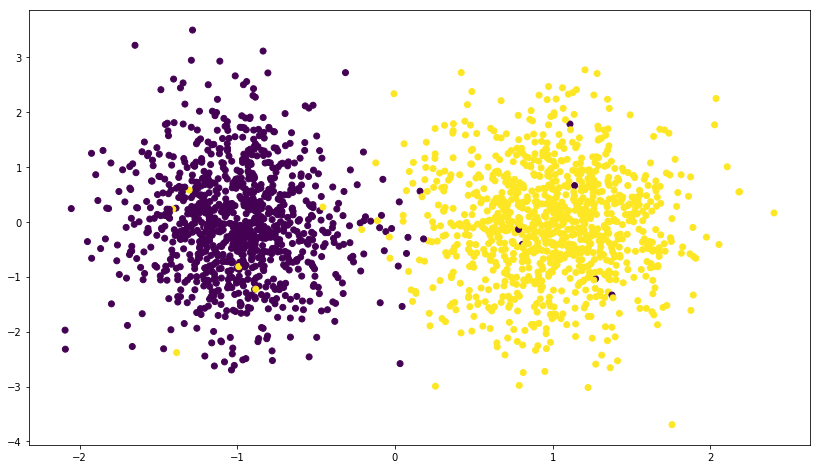

In [42]:
plt.figure(figsize=(14,8))
plt.scatter(x=X02[:,0],y=X02[:,1],c=y01)
plt.show()

## 3 模型准备

In [43]:
bagging01 = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging01

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

## 4模型训练

In [44]:
%%time
bagging01.fit(X=X02,y=y01)

Wall time: 33 ms


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [45]:
bagging01

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

## 5 模型预测

In [46]:
%%time
predict02=bagging01.predict(X=X02)

Wall time: 61 ms


In [47]:
predict02[:50]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0])

## 6 结果对比

In [48]:
y01[:50]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0])

## 7准确率判断

In [49]:
y01.shape[0]

2000

In [50]:
print("总数量： %d ，预测失败数量 : %d" % (y01.shape[0],(y01 != predict02).sum()))

总数量： 2000 ，预测失败数量 : 23


In [51]:
print '模型准确率：%f %s' % (metrics.accuracy_score(y_true=y01,y_pred=predict02)*100,'%')

模型准确率：98.850000 %
